Question 1

In [14]:
import tweepy
import sqlite3

In [15]:
#API credentials
api_key = 'k7OKdjp9MWPPW8gg5drsvpVs9'
api_key_secret = 'f0fopZutmbpyEQjfzUJGb289Ua8bVHlkf24ya6m9qsd0ITdsrZ'
access_token = '1654605464984866816-pfTNW7EEHF5uo7PccQVVrYHL7SkSmy'
access_token_secret = 'c8AQFk6hfS2juZXuyPIAhnk5Fw30GzutClxfRTRz2xfqX'



In [17]:
#creating database
conn = sqlite3.connect('twitter_users.db')
cursor = conn.cursor()

In [19]:
#users table
create_table_query = '''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        screen_name TEXT,
        username TEXT,
        user_location TEXT,
        user_description TEXT,
        num_follows INTEGER,
        num_friends INTEGER,
        num_statuses INTEGER,
        user_url TEXT
    )
'''
cursor.execute(create_table_query)

In [20]:
# Creating the authentication object
auth = tweepy.OAuthHandler(api_key, api_key_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

In [21]:
# List of user IDs to collect information
user_ids = ["@johnsmith123", "@sarahjones456", "@mikebrown789", "@emilywilson234", "@davidthomas567"]

In [25]:
#to fetch details
for user_id in user_ids:
    try:
        user = api.get_user(id=user_id)
        
        # Extract user information
        screen_name = user.screen_name
        username = user.name
        user_location = user.location
        user_description = user.description
        num_follows = user.followers_count
        num_friends = user.friends_count
        num_statuses = user.statuses_count
        user_url = user.url
        
        # Insert user information into the SQLite table
        insert_query = '''
            INSERT INTO users (
                screen_name, username, user_location, user_description,
                num_follows, num_friends, num_statuses, user_url
            )
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        '''
        data = (
            screen_name, username, user_location, user_description,
            num_follows, num_friends, num_statuses, user_url
        )
        cursor.execute(insert_query, data)
        conn.commit()
        
        print(f"User {screen_name} data inserted into the database.")
        
    except tweepy.TweepError as e:
        print(f"Error occurred for user {user_id}: {str(e)}")

# Close the SQLite connection
cursor.close()
conn.close()

AttributeError: ignored

Question - 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

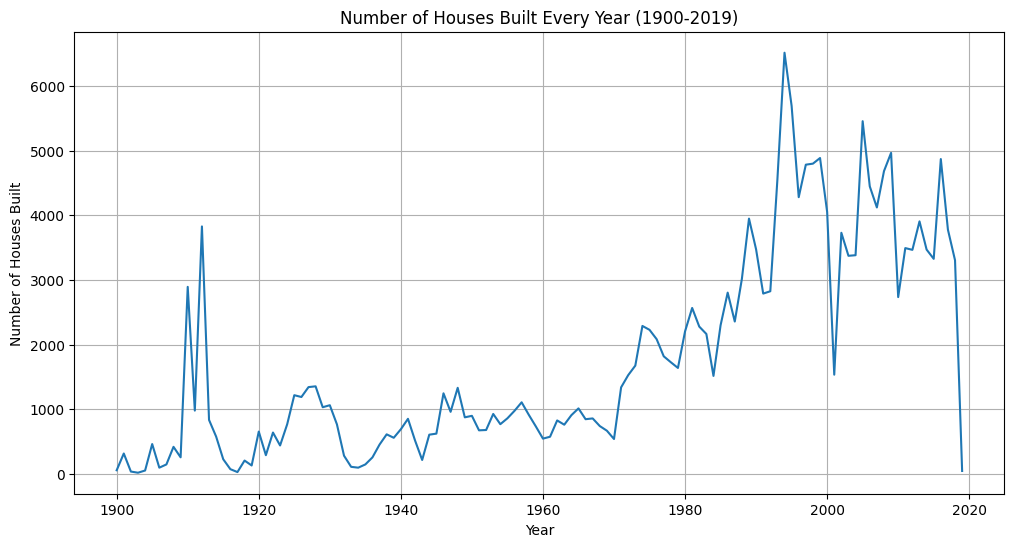

In [27]:
df = pd.read_csv("assignment_4_property_tax_report_2019.csv")

# Convert the 'YEAR_BUILT' column to datetime
df['YEAR_BUILT'] = pd.to_datetime(df['YEAR_BUILT'], format='%Y')

# Filter houses built between 1900 and 2019
filtered_df = df[(df['YEAR_BUILT'].dt.year >= 1900) & (df['YEAR_BUILT'].dt.year <= 2019)]

# 2.1: Line Plot - Number of houses built every year
houses_built_per_year = filtered_df['YEAR_BUILT'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(houses_built_per_year.index, houses_built_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Houses Built')
plt.title('Number of Houses Built Every Year (1900-2019)')
plt.grid(True)
plt.show()


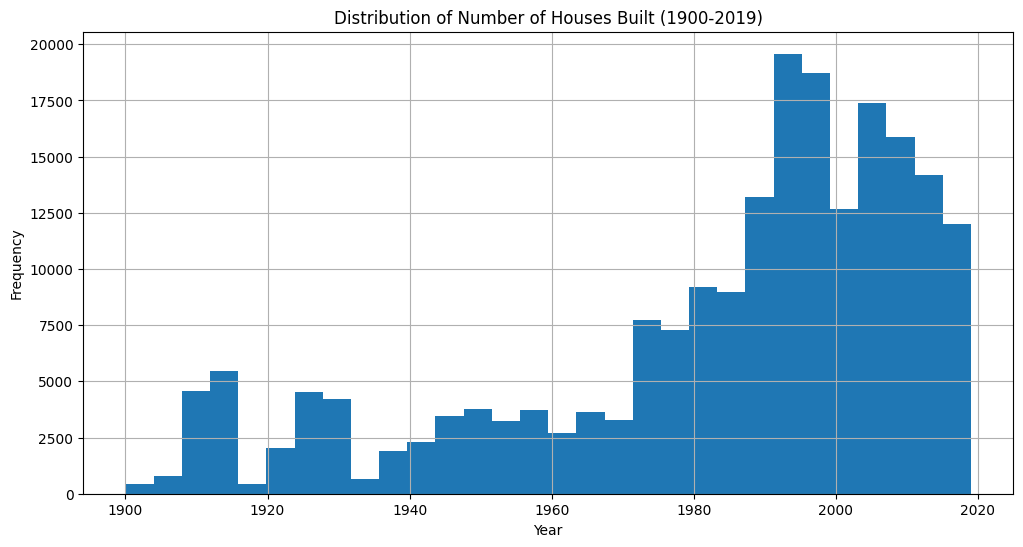

In [28]:
# 2.2: Histogram - Distribution of number of houses built
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['YEAR_BUILT'].dt.year, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Houses Built (1900-2019)')
plt.grid(True)
plt.show()


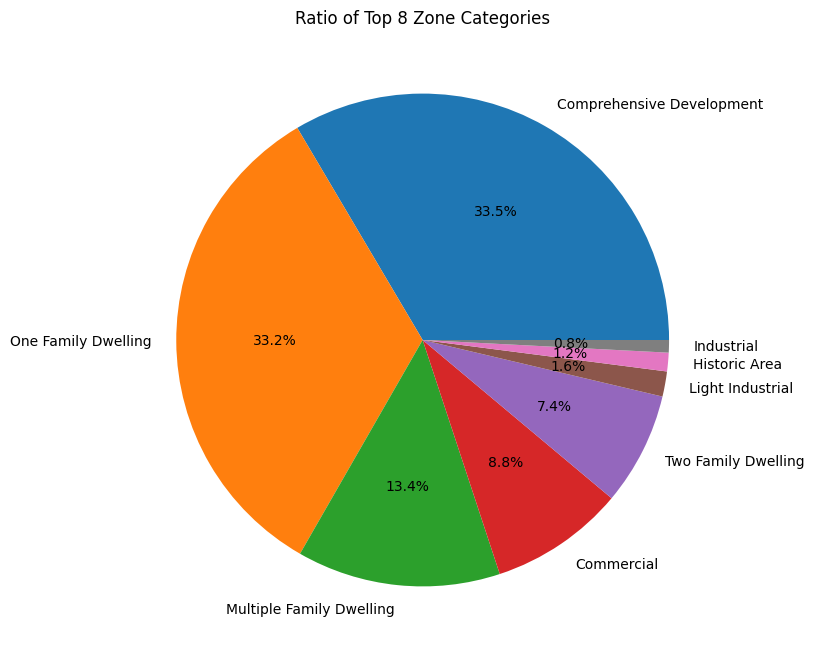

In [29]:
# 2.3: Pie Chart - Ratio of Top 8 zone categories
top_zones = df['ZONE_CATEGORY'].value_counts().nlargest(8)

plt.figure(figsize=(8, 8))
plt.pie(top_zones, labels=top_zones.index, autopct='%1.1f%%')
plt.title('Ratio of Top 8 Zone Categories')
plt.show()

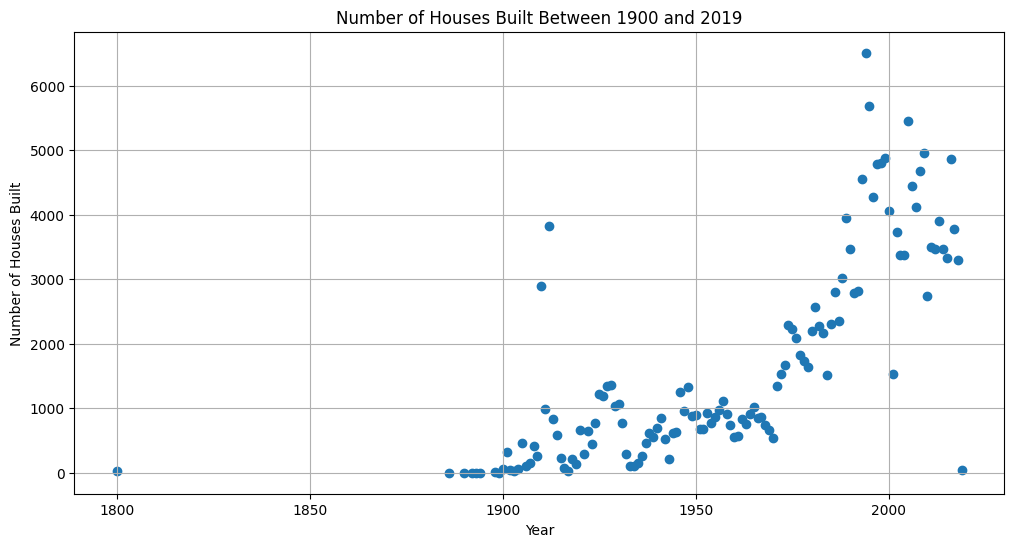

In [31]:
# 2.4: Scatter Plot - Number of houses built over time
houses_built_over_time = df.groupby('YEAR_BUILT').size()

plt.figure(figsize=(12, 6))
plt.scatter(houses_built_over_time.index.year, houses_built_over_time.values)
plt.xlabel('Year')
plt.ylabel('Number of Houses Built')
plt.title('Number of Houses Built Between 1900 and 2019')
plt.grid(True)
plt.show()